In [22]:
#!pip install tensorflow==2.9.1

In [38]:
1400/800, 1280/720, 800*1.7777777777777777

(1.75, 1.7777777777777777, 1422.2222222222222)

In [43]:
7200/1.5

4800.0

In [40]:
1. / 0.14722222222222223

6.792452830188679

In [41]:
175*6.8

1190.0

In [42]:
720/106

6.7924528301886795

## Imports

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from PIL import Image
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Directory, Image-Name & Image-Size Definitions

In [24]:
model_dir = '/home/drevital/cs_video_processor/models/jun22_a'
im_dir = '/home/drevital/obstacles_classification_datasets/test'
im_name = '1038_71961_0.51_.51_2022-02-01--03-13-41__unknown_.jpg'
im_height = 200
im_width = 600

## Load Trained Model

In [25]:
model = tf.keras.models.load_model(model_dir)

## Read Image

In [26]:
im = cv2.imread(os.path.join(im_dir, im_name))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  

## Display Images

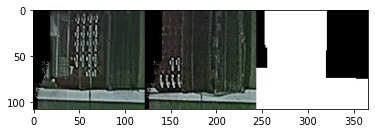

In [27]:
plt.imshow(im)
plt.show() 

## Prepare Image for Prediction

In [28]:
pil_im = Image.fromarray(im)
pil_im = pil_im.resize((im_width, im_height))

In [29]:
#im = tf.image.resize(im, [im_height, im_width], method='nearest')
imarr = np.array(pil_im, dtype='float32')

In [30]:
w = imarr.shape[1]

im1 = imarr[:, :w//3]
im2 = imarr[:, w//3:(w*2)//3] 
im3 = imarr[:, (w*2)//3:] 
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.cvtColor(im3, cv2.COLOR_RGB2GRAY)

# Translate original rabge (0-255) to trained range (0.0-1.0)
im1 /= 255.0
im2 /= 255.0
im3 /= 255.0

# Reshape to match model's input shape
im1 = im1.reshape(1, im1.shape[0], im1.shape[1], 3)
im2 = im2.reshape(1, im2.shape[0], im2.shape[1], 3)
im3 = im3.reshape(1, im3.shape[0], im3.shape[1], 1)

In [31]:
im1[0][0][:20]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [32]:
im2[0][0][:10]

array([[0.03921569, 0.05098039, 0.04313726],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00784314],
       [0.00392157, 0.        , 0.01176471],
       [0.00784314, 0.        , 0.01176471],
       [0.00392157, 0.00392157, 0.00392157],
       [0.00784314, 0.00784314, 0.        ],
       [0.00784314, 0.00784314, 0.        ],
       [0.00392157, 0.00784314, 0.        ],
       [0.        , 0.00784314, 0.        ]], dtype=float32)

In [33]:
im3[0][0][:10]

array([[0.03872549],
       [0.        ],
       [0.        ],
       [0.00873726],
       [0.01265882],
       [0.00089412],
       [0.00044706],
       [0.        ],
       [0.        ],
       [0.00117255]], dtype=float32)

## Predict 

In [34]:
prediction = model.predict([im1, im2, im3])

1/1 [==============================] - 0s 133ms/step


In [35]:
prediction

array([[0.318739]], dtype=float32)